# Cumulative accuracy profile

### Demonstration of the CAP tool for binary classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from logistic_regressor import LogisticRegressor

from cap import cap

** Generate training and test datasets **
<br>
Note that noise is deliberately high, otherwise CAP is very close to perfect for this example and hard to visualize 

In [2]:
size =1000

coefficients = [0,-1.4,1.1,-4,4.8,-10]
x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x[:,i]=np.random.rand(size)
y = np.vectorize(lambda x: round(1/(1+np.exp(-x))))((x*coefficients).sum(axis=1) + 3*np.random.normal(size=size))
coefficients

t_x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    t_x[:,i]=np.random.rand(size)
t_y = np.vectorize(lambda x: round(1/(1+np.exp(-x))))((t_x*coefficients).sum(axis=1) + 3*np.random.normal(size=size))

Data is deliberately not balanced to make CAP curve more steep

In [3]:
print('0s\t 1s')
print((y==0).sum(),'\t',(y==1).sum())

0s	 1s
859 	 141


### Fit and predict

In [4]:
log = LogisticRegressor()
log.fit(x,y,epochs=100,learning_rate=0.01,bin_size=1)
# prediction labels
pred = log.predict(t_x) 
# probability of label 1
prob = log.predict(t_x,True)

print((pred==t_y).sum())

854


Performance is mediocre due to implemented high noise (see above)

### Generate cumulative accuracy profile

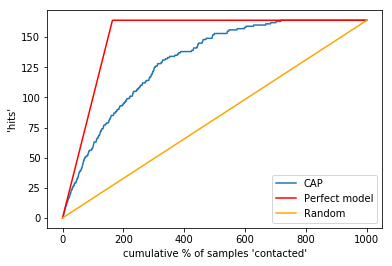

In [5]:
# cap
xy = cap(t_y,prob)
# perfect scenario for comparison
perfect = cap(t_y,None,perfect=True)
# random selector for comparison
random = np.asarray([[0,0],[len(t_y),(t_y==True).sum()]])

# plot
plt.plot(xy[:,0],xy[:,1],label='CAP')
plt.plot(perfect[:,0],perfect[:,1],'r',label='Perfect model')
plt.plot(random[:,0],random[:,1],'orange',label='Random')
plt.ylabel("'hits'")
plt.xlabel("cumulative % of samples 'contacted'")
plt.legend()
plt.show()